<div class="row">
    <img src="https://matplotlib.org/_static/logo2.png" alt="Matplotlib Logo" style="width: 25%">    
    <img src="https://www.atmos.albany.edu/products/nysm/NYSMLogo.png" alt="NYSM Logo" style="width: 30%">
    <img src="https://github.com/pandas-dev/pandas/raw/main/web/pandas/static/img/pandas.svg" alt="pandas Logo" style="width: 25%">
</div>

# Pandas 3: Plotting NYS Mesonet Observations
---

## Overview
In this notebook, we'll use Pandas to read in and analyze current data from the [New York State Mesonet](https://www2.nysmesonet.org). We will also use Matplotlib to plot the locations of NYSM sites.

## Prerequisites

| Concepts | Importance | Notes |
| --- | --- | --- |
| Matplotlib | Necessary | |
| Pandas  | Necessary |  |

* **Time to learn**: 15 minutes

___
## Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Create a Pandas `DataFrame` object pointing to the latest set of obs.

In [2]:
nysm_data = pd.read_csv('https://www.atmos.albany.edu/products/nysm/nysm_latest.csv')

Create `Series` objects for several columns from the `DataFrame`.

First, remind ourselves of the column names.

In [3]:
nysm_data.columns

Index(['station', 'time', 'temp_2m [degC]', 'temp_9m [degC]',
       'relative_humidity [percent]', 'precip_incremental [mm]',
       'precip_local [mm]', 'precip_max_intensity [mm/min]',
       'avg_wind_speed_prop [m/s]', 'max_wind_speed_prop [m/s]',
       'wind_speed_stddev_prop [m/s]', 'wind_direction_prop [degrees]',
       'wind_direction_stddev_prop [degrees]', 'avg_wind_speed_sonic [m/s]',
       'max_wind_speed_sonic [m/s]', 'wind_speed_stddev_sonic [m/s]',
       'wind_direction_sonic [degrees]',
       'wind_direction_stddev_sonic [degrees]', 'solar_insolation [W/m^2]',
       'station_pressure [mbar]', 'snow_depth [cm]', 'frozen_soil_05cm [bit]',
       'frozen_soil_25cm [bit]', 'frozen_soil_50cm [bit]',
       'soil_temp_05cm [degC]', 'soil_temp_25cm [degC]',
       'soil_temp_50cm [degC]', 'soil_moisture_05cm [m^3/m^3]',
       'soil_moisture_25cm [m^3/m^3]', 'soil_moisture_50cm [m^3/m^3]', 'lat',
       'lon', 'elevation', 'name'],
      dtype='object')

Create several `Series` objects for particular columns of interest. 

In [4]:
stid = nysm_data['station']
lats = nysm_data['lat']
lons = nysm_data['lon']
time = nysm_data['time']
tmpc = nysm_data['temp_2m [degC]']
tmpc9 = nysm_data['temp_9m [degC]']
rh   = nysm_data['relative_humidity [percent]']
pres = nysm_data['station_pressure [mbar]']
wspd = nysm_data['max_wind_speed_prop [m/s]']
drct = nysm_data['wind_direction_prop [degrees]']
pinc = nysm_data['precip_incremental [mm]']
ptot = nysm_data['precip_local [mm]']
pint = nysm_data['precip_max_intensity [mm/min]']

Examine one or more of these `Series`.

In [5]:
tmpc

0       7.2
1       2.6
2       1.6
3      11.3
4       2.6
       ... 
121    -1.6
122    -0.9
123     3.8
124     2.4
125     3.0
Name: temp_2m [degC], Length: 126, dtype: float64

<div class="alert alert-warning">
    <b>Exercise:</b> Read in at least one additional <code>Series</code> object.</div>

In [7]:
pres

0      947.46
1      944.35
2      976.95
3      992.89
4      951.13
        ...  
121    930.32
122    953.40
123    998.79
124    994.51
125    988.88
Name: station_pressure [mbar], Length: 126, dtype: float64

<div class="alert alert-info">
    <b>Tip:</b> Each of these <code>Series</code> objects contain data stored as <b>NumPy</b> arrays. As a result, we can take advantage of <i>vectorizing</i>, which perform operations on all array elements without needing to construct a Python <code>for</code> loop. </div>

Convert the temperature and wind speed arrays to Fahrenheit and knots, respectively.

In [8]:
tmpf = tmpc * 1.8 + 32
wspk = wspd * 1.94384

Examine the new `Series`. Note that every element of the array has been calculated using the arithemtic above ... in just one line of code per `Series`!

In [9]:
tmpf

0      44.96
1      36.68
2      34.88
3      52.34
4      36.68
       ...  
121    29.12
122    30.38
123    38.84
124    36.32
125    37.40
Name: temp_2m [degC], Length: 126, dtype: float64

<div class="alert alert-info">
    <b>Note:</b> The <i>metadata</i> did not change to reflect the change in units! That is something we'd have to change manually, via the <code>Series</code>' <i>name</i> attribute.</div>

In [10]:
tmpf.name = 'temp_2m [degF]'

In [11]:
tmpf

0      44.96
1      36.68
2      34.88
3      52.34
4      36.68
       ...  
121    29.12
122    30.38
123    38.84
124    36.32
125    37.40
Name: temp_2m [degF], Length: 126, dtype: float64

Next, get the basic statistical properties of one of the `Series`.

In [12]:
tmpf.describe()

count    125.00000
mean      37.57712
std        6.38638
min       28.04000
25%       33.08000
50%       36.32000
75%       40.10000
max       54.86000
Name: temp_2m [degF], dtype: float64

<div class="alert alert-warning">
    <b>Exercise:</b> Convert the 9-m temperature to Fahrenheit, and examine its corresponding statistical properties. What do you notice in terms of the <b>count</b>? Why is there a difference in <b>counts</b> between the 9 m and 2 m arrays?</div>

In [16]:
tmpf9 = tmpc9 * 1.8 + 32

In [17]:
tmpf9

0      44.96
1      36.32
2      35.06
3      51.26
4      36.68
       ...  
121    28.76
122    30.20
123    38.48
124    36.14
125    36.68
Name: temp_9m [degC], Length: 126, dtype: float64

In [18]:
tmpf9.name = 'temp_9m [degF]'

In [20]:
tmpf9

0      44.96
1      36.32
2      35.06
3      51.26
4      36.68
       ...  
121    28.76
122    30.20
123    38.48
124    36.14
125    36.68
Name: temp_9m [degF], Length: 126, dtype: float64

### Plot station locations using Matplotlib
We use another plotting method for an `Axes` element ... in this case, a [Scatter](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html) plot. We pass as arguments into this method the x- and y-arrays, corresponding to longitudes and latitudes, and then set five additional attributes.

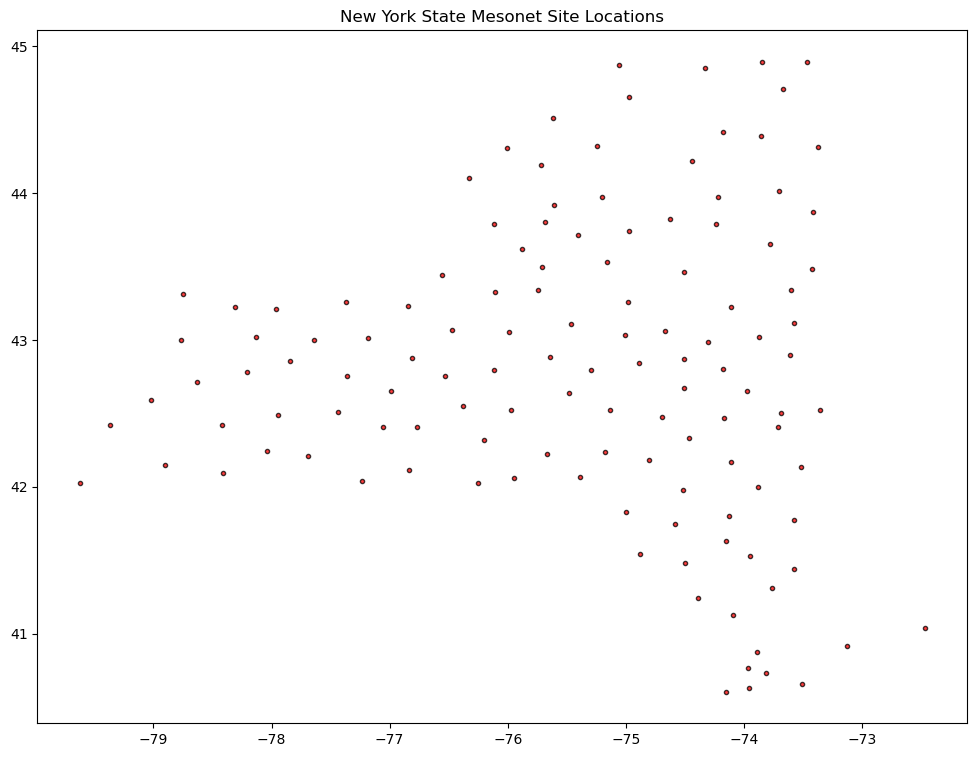

In [25]:
fig = plt.figure(figsize=(12,9))
ax = fig.add_subplot(1,1,1)
ax.set_title ('New York State Mesonet Site Locations')
ax.scatter(lons,lats,s=9,c='r',edgecolor='black',alpha=0.75)

<div class="alert alert-warning">
    <b>Exercise:</b> Examine the link above for how we can call the <code>scatter</code> function. Try changing one or more of the five argument values we used above, and try different arguments as well.</div>

## What's Next?

We can discern the outline of New York State! But wouldn't it be nice if we could plot cartographic features, such as physical and/or political borders (e.g., coastlines, national/state/provincial boundaries), as well as *georeference* the data we are plotting? We'll cover that next with the **Cartopy** package!